# Project Title :- Bike Rental Count Prediction

**Team Id :- PTID-CDS-SEP-22-1376**

# Contents

1.   Problem Statement
2.   Business Case
3.   Background of the Project
4.   Source of the Data Set
5.   Importing Libraries
6.   Loading the Data
7.   Domain Analysis
8.   Basic Checks
9.   Exploratory Data Analysis
     - Univariate Analysis
     - Bivariate Analysis
     - Multivariate Analysis
10.   Data Preprocessing
     - Handling Outliers
     - Encoding Categorical Variables using One Hot Encoding
11.   Model Selection
     - Importing Models
     - Training models with the Data and
       Selecting the best model with the help of CV Score
12.  Spliting the Data into Test Train Splits
13.  Model Training with the selected model
14.  Model Evaluation
15.  Hypertuning the Model
16.  Evaluation of the Hypertuned Model
17.  Conclusion





# 1.Problem Statement
  The goal of this project is to combine the historical bike usage patterns with the weather data in order to forecast bike rental demand.

Target Column to be predicted: 'total_count'
Input Columns used as variables (12 columns): ['date','year','month','hour','season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']
The other two columns (casual and registered) comprises of the split-up of the target column 'total_count'..

# 2.Business Case


1.   If We are able to predict the count of bikes Rented at a Perticular time or season or environmental conditions, we will be able to manage the inventory of bikes far better than we would have done it on the regular basis
2.   We can also manage the marketing aspect of the bike rentals on the basis of rental behaviours of the Customers



## 3.Background of the Project
Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.

Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

## 4.Source of the Data Set
Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. The core data set is related to
the two-year historical log corresponding to years 2011 and 2012 from Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. We aggregated the data on two hourly and daily basis and then extracted and added the corresponding weather and seasonal information. Weather information are extracted from http://www.freemeteo.com.

# 5.Importing Libraries

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 6.Loading the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Bike Rental Project/hour.csv")

# 7.Domain Analysis

### The Dataset contains the following Information 
 - instant: record index
 - dteday : date
 - season : season (1:spring, 2:summer, 3:fall, 4:winter)
 - yr : year (0: 2011, 1:2012)
 - mnth : month ( 1 to 12)
 - hr : hour (0 to 23)
 - holiday : weather day is holiday or not
 - weekday : day of the week
 - workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
 - weathersit :
    - 1: Clear, Few clouds, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
 - temp : Normalized temperature in Celsius. The values are divided to 41 (max)
 - atemp: Normalized feeling temperature in Celsius. The values are divided to 50 (max)
    -  The "feels like" temperature is a measurement of how hot or cold it really feels like outside. The “Feels Like” temperature relies on environmental data including the ambient air temperature, relative humidity, and wind speed to determine how weather conditions feel to bare skin.
 - hum: Normalized humidity. The values are divided to 100 (max)
 - windspeed: Normalized wind speed. The values are divided to 67 (max)
 - casual: count of casual users
 - registered: count of registered users
 - cnt: count of total rental bikes including both casual and registered

# 8.Basic Checks

1.How big is the data?

In [ ]:
df.shape

(17379, 17)

The data contains 17379 rows and 17 columns

2. How does the data look like?

In [ ]:
df.sample(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
14891,14892,2012-09-17,3,1,9,16,0,1,1,2,0.64,0.6061,0.69,0.2537,74,379,453
10552,10553,2012-03-20,1,1,3,19,0,2,1,1,0.58,0.5455,0.73,0.1343,75,480,555
9317,9318,2012-01-29,1,1,1,3,0,0,0,1,0.26,0.2576,0.28,0.1940,4,17,21
2802,2803,2011-05-01,2,0,5,16,0,0,0,2,0.50,0.4848,0.72,0.1940,75,139,214
7174,7175,2011-10-31,4,0,10,13,0,1,1,2,0.44,0.4394,0.44,0.2239,24,128,152


3.What are the data types of the columns?

4.What is the number of non null rows?

5.What is the total number of entries in our dataset?


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


6. Are there any missing values?

In [ ]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

7. How does the Data look Statistically?

In [ ]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


8. Are there any Duplicate values?

In [ ]:
df.duplicated().sum()

0

9. How is the Correlation between Columns?

In [ ]:
df.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


# Renaming the Columns for better Understanding

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
df.rename(columns = {'instant':'rec_id','dteday':'date','yr':'year','mnth':'month','hr':'hour','weathersit':'weather_conditions','hum':'humidity','cnt':'total_count'},inplace=True)

In [ ]:
df

,rec_id,date,season,year,month,hour,holiday,weekday,workingday,weather_conditions,temp,atemp,humidity,windspeed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


##Changing data type of date column from object to datetime

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   rec_id              17379 non-null  int64         
 1   date                17379 non-null  datetime64[ns]
 2   season              17379 non-null  int64         
 3   year                17379 non-null  int64         
 4   month               17379 non-null  int64         
 5   hour                17379 non-null  int64         
 6   holiday             17379 non-null  int64         
 7   weekday             17379 non-null  int64         
 8   workingday          17379 non-null  int64         
 9   weather_conditions  17379 non-null  int64         
 10  temp                17379 non-null  float64       
 11  atemp               17379 non-null  float64       
 12  humidity            17379 non-null  float64       
 13  windspeed           17379 non-null  float64   

# 9.Exploratory Data analysis

### Univariate Analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   rec_id              17379 non-null  int64         
 1   date                17379 non-null  datetime64[ns]
 2   season              17379 non-null  int64         
 3   year                17379 non-null  int64         
 4   month               17379 non-null  int64         
 5   hour                17379 non-null  int64         
 6   holiday             17379 non-null  int64         
 7   weekday             17379 non-null  int64         
 8   workingday          17379 non-null  int64         
 9   weather_conditions  17379 non-null  int64         
 10  temp                17379 non-null  float64       
 11  atemp               17379 non-null  float64       
 12  humidity            17379 non-null  float64       
 13  windspeed           17379 non-null  float64   

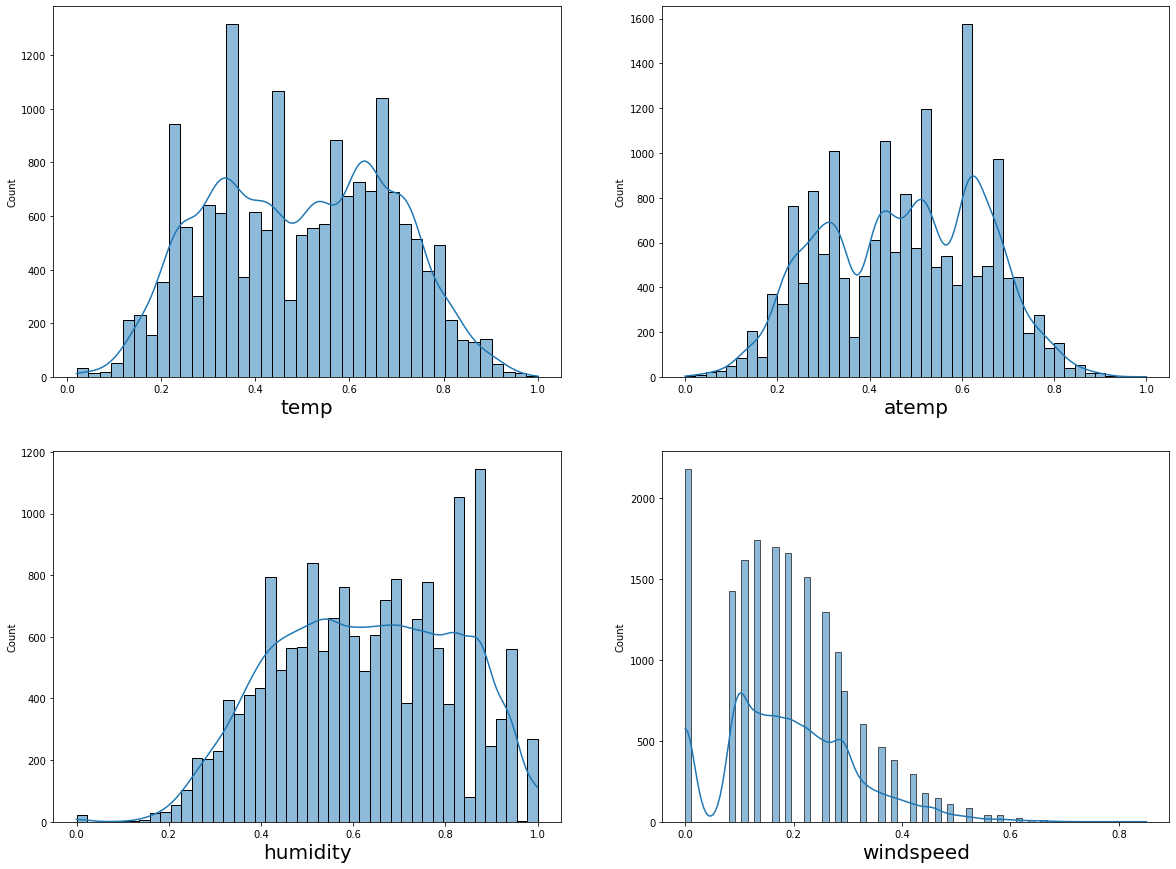

In [ ]:
plt.figure(figsize=(20,15))
plotnumber = 1

for column in df.columns[10:14]:
  if plotnumber<=4:
    ax = plt.subplot(2,2,plotnumber)
    sns.histplot(x=column,data=df,kde=True,)
    plt.xlabel(column,fontsize=20)

  plotnumber+=1

Temp and atemp data are normally distributed

where as humidity data is left Skewed and Windspeed data is right skewed

# Checking for Outliers 

In [ ]:
df.columns

Index(['rec_id', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather_conditions', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count'],
      dtype='object')

In [ ]:
Numerical_variables = df.loc[:,['temp', 'atemp','humidity', 'windspeed']]

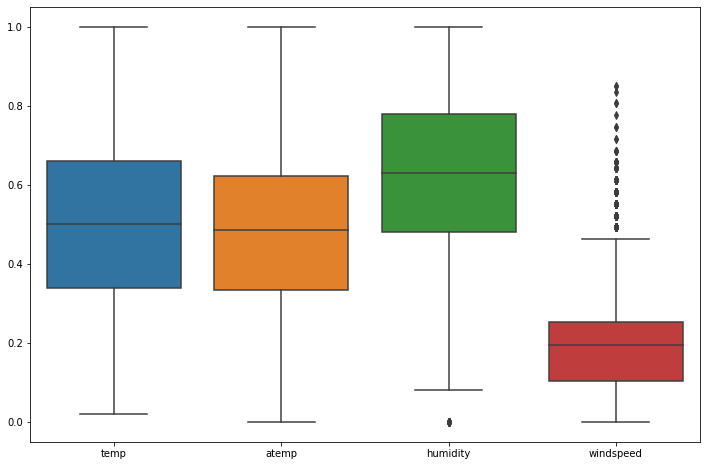

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data = Numerical_variables)

Humidity and Windspeed Column have Outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


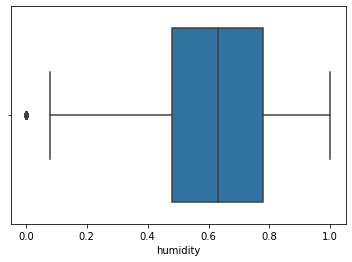

In [ ]:
sns.boxplot(df['humidity'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


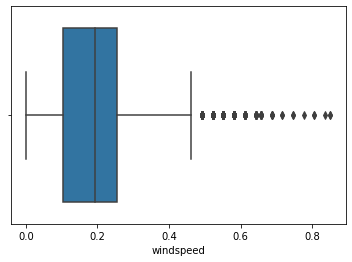

In [ ]:
sns.boxplot(df['windspeed'])

### Bivariate Analysis

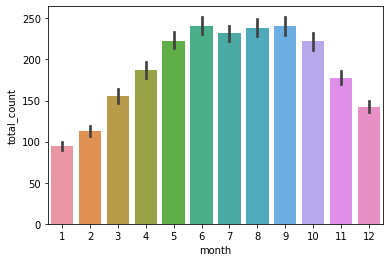

In [ ]:
sns.barplot(x='month',y='total_count',data=df)

the count of the total bikes rented is more in the months between April and November

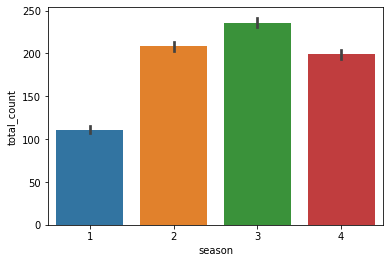

In [ ]:
sns.barplot(x='season',y='total_count',data=df)

Least number of bikes are rented in the Spring Season

season : season (1:spring, 2:summer, 3:fall, 4:winter)

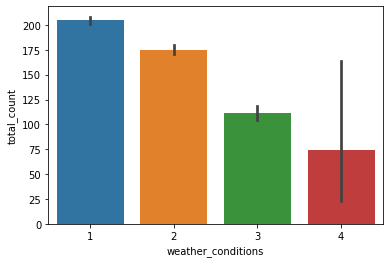

In [ ]:
sns.barplot(x='weather_conditions',y='total_count',data=df)

 - weather_conditions :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

- People Prefer renting bikes more when the weather is Clear or there are few clouds rather than when it is raining or there is a snowfall

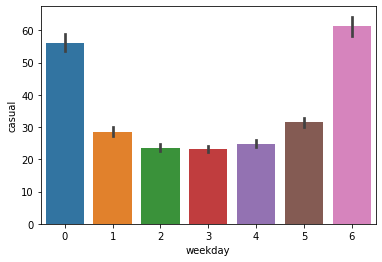

In [ ]:
sns.barplot(x='weekday',y='casual',data=df)

Casual Users usually rent more bikes on weekends as compared to weekdays

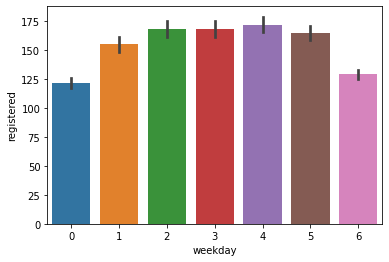

In [ ]:
sns.barplot(x='weekday',y='registered',data=df)

Registered Users Usually tend to rent bikes on week days as compared to weekends

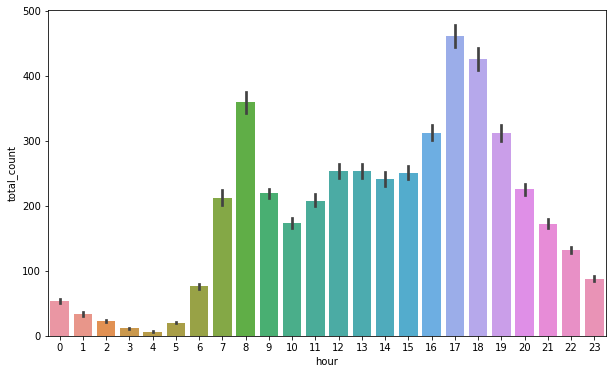

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='hour',y = 'total_count',data=df)

The total count of bike rentals spikes in the morning around 8am , and in the evening around 5pm to 6pm

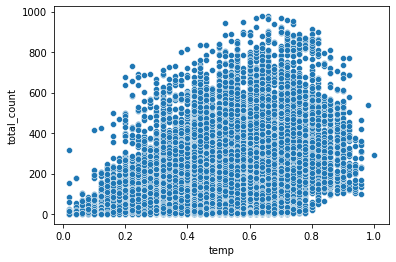

In [ ]:
sns.scatterplot(x='temp',y='total_count',data=df)

When the Temperature is too low or too high the count of bikes which are rented is low

When the Temperature is Moderate the count of bikes which are rented is high

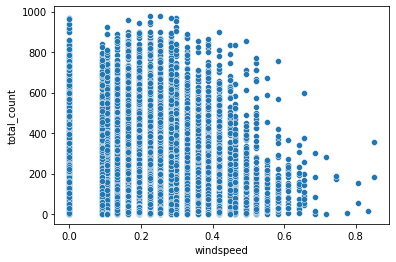

In [ ]:
sns.scatterplot(x='windspeed',y='total_count',data=df)

When the windspeed is low to moderate the atmosphere is calm , so people prefer renting bikes more for in such atmosphere 

When windspeed is high people usually avoid renting bikes

# Multivariate Analysis

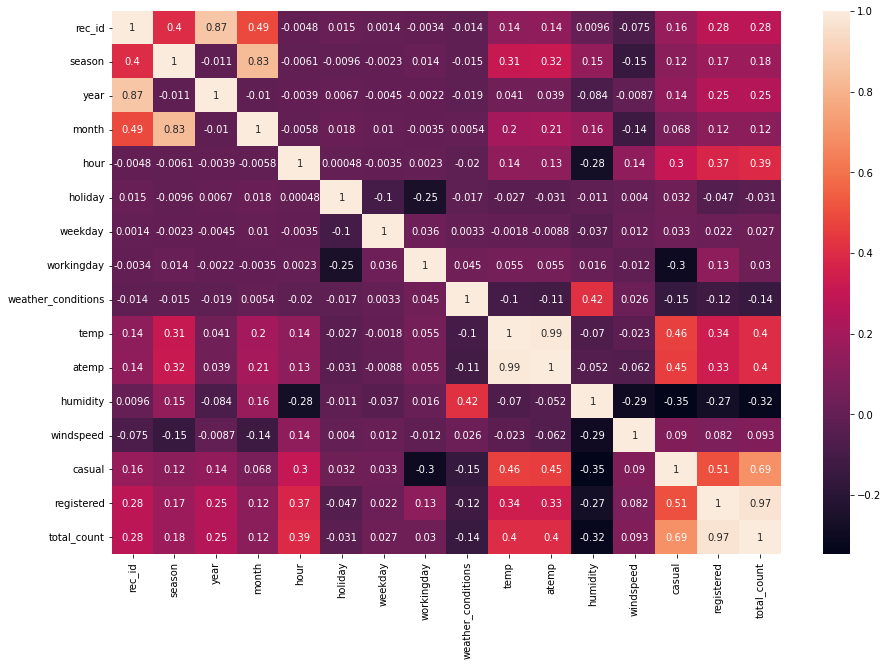

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(data = df.corr(),annot = True)

Here we can see that atemp column is strongly correlated to temp column, so we can drop atemp column.

# 10.Data Preprocessing

## Handling Outliers

### Handling Outliers from Humidity Column

Getting upper_limit and lower_Limit Values

In [ ]:
Q1 = df['humidity'].quantile(0.25)
Q3 = df['humidity'].quantile(0.75)
IQR = Q3-Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

Checking data points that are above upper limit




In [ ]:
df[df['humidity']>upper_limit]

,rec_id,date,season,year,month,hour,holiday,weekday,workingday,weather_conditions,temp,atemp,humidity,windspeed,casual,registered,total_count


Checking data points that are below lower limit

In [ ]:
df[df['humidity']<lower_limit]

,rec_id,date,season,year,month,hour,holiday,weekday,workingday,weather_conditions,temp,atemp,humidity,windspeed,casual,registered,total_count
1551,1552,2011-03-10,1,0,3,0,0,4,1,3,0.34,0.3182,0.0,0.2537,3,0,3
1552,1553,2011-03-10,1,0,3,1,0,4,1,3,0.34,0.3182,0.0,0.2537,0,2,2
1553,1554,2011-03-10,1,0,3,2,0,4,1,3,0.34,0.3182,0.0,0.2537,0,1,1
1554,1555,2011-03-10,1,0,3,5,0,4,1,3,0.36,0.3485,0.0,0.1940,1,2,3
1555,1556,2011-03-10,1,0,3,6,0,4,1,3,0.36,0.3333,0.0,0.3284,0,12,12
1556,1557,2011-03-10,1,0,3,7,0,4,1,3,0.38,0.3939,0.0,0.2239,1,36,37
1557,1558,2011-03-10,1,0,3,8,0,4,1,3,0.38,0.3939,0.0,0.2836,1,43,44
1558,1559,2011-03-10,1,0,3,9,0,4,1,3,0.40,0.4091,0.0,0.2239,1,23,24
1559,1560,2011-03-10,1,0,3,10,0,4,1,3,0.40,0.4091,0.0,0.1642,0,17,17
1560,1561,2011-03-10,1,0,3,11,0,4,1,3,0.40,0.4091,0.0,0.2537,6,5,11


Imputing outliers present in the humidity column with Median as the Humidity data is skewed

In [ ]:
median = float(df['humidity'].median())
df['humidity'] = np.where(df['humidity']<lower_limit,median,df['humidity'])

Checking whether the outliers are imputed Correctly

In [ ]:
df[df['humidity']<lower_limit]

,rec_id,date,season,year,month,hour,holiday,weekday,workingday,weather_conditions,temp,atemp,humidity,windspeed,casual,registered,total_count


as there are no datapoints below lower limit, we can say outliers are successfully imputed.

### Handling outliers from windspeed column

Getting upper_limit and lower_Limit Values

In [ ]:
Q1 = df['windspeed'].quantile(0.25)
Q3 = df['windspeed'].quantile(0.75)
IQR = Q3-Q1
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

Checking data points that are above upper limit

In [ ]:
df[df['windspeed']>upper_limit]

,rec_id,date,season,year,month,hour,holiday,weekday,workingday,weather_conditions,temp,atemp,humidity,windspeed,casual,registered,total_count
175,176,2011-01-08,1,0,1,14,0,6,0,1,0.20,0.1667,0.32,0.4925,12,83,95
178,179,2011-01-08,1,0,1,17,0,6,0,1,0.16,0.1212,0.37,0.5522,5,64,69
194,195,2011-01-09,1,0,1,9,0,0,0,1,0.12,0.0758,0.46,0.5224,0,19,19
196,197,2011-01-09,1,0,1,11,0,0,0,1,0.16,0.1212,0.40,0.5224,2,47,49
265,266,2011-01-12,1,0,1,12,0,3,1,1,0.20,0.1515,0.47,0.5821,3,52,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17327,17328,2012-12-29,1,1,12,20,0,6,0,2,0.30,0.2424,0.56,0.5522,2,64,66
17328,17329,2012-12-29,1,1,12,21,0,6,0,2,0.28,0.2424,0.56,0.4925,4,56,60
17341,17342,2012-12-30,1,1,12,10,0,0,0,1,0.26,0.2121,0.41,0.5821,31,91,122
17343,17344,2012-12-30,1,1,12,12,0,0,0,1,0.28,0.2273,0.36,0.5821,47,97,144


Checking data points that are below lower limit

In [ ]:
df[df['windspeed']<lower_limit]

,rec_id,date,season,year,month,hour,holiday,weekday,workingday,weather_conditions,temp,atemp,humidity,windspeed,casual,registered,total_count


Imputing outliers present in the windspeed column with Median as the windspeed data is skewed

In [ ]:
median = float(df['windspeed'].median())
df['windspeed'] = np.where(df['windspeed']>upper_limit,median,df['windspeed'])

Checking whether the outliers are imputed Correctly

In [ ]:
df[df['windspeed']>upper_limit]

,rec_id,date,season,year,month,hour,holiday,weekday,workingday,weather_conditions,temp,atemp,humidity,windspeed,casual,registered,total_count


as there are no datapoints above upper limit, we can say outliers are successfully imputed.

## Adding a day column to the dataset

In [ ]:
df['day']=df['date'].dt.day

In [ ]:
df

,rec_id,date,season,year,month,hour,holiday,weekday,workingday,weather_conditions,temp,atemp,humidity,windspeed,casual,registered,total_count,day
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,31
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,31
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,31
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,31


# Encoding Categorical variables using One Hot Encoding

In [ ]:
df.columns

Index(['rec_id', 'date', 'season', 'year', 'month', 'hour', 'holiday',
       'weekday', 'workingday', 'weather_conditions', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count', 'day'],
      dtype='object')

In [ ]:
df1 = pd.get_dummies(df,columns=['season','month', 'hour','weekday','weather_conditions','day'],drop_first=True)

In [ ]:
df1

,rec_id,date,year,holiday,workingday,temp,atemp,humidity,windspeed,casual,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,1,2011-01-01,0,0,0,0.24,0.2879,0.81,0.0000,3,...,0,0,0,0,0,0,0,0,0,0
1,2,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0000,8,...,0,0,0,0,0,0,0,0,0,0
2,3,2011-01-01,0,0,0,0.22,0.2727,0.80,0.0000,5,...,0,0,0,0,0,0,0,0,0,0
3,4,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0000,3,...,0,0,0,0,0,0,0,0,0,0
4,5,2011-01-01,0,0,0,0.24,0.2879,0.75,0.0000,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,0,1,0.26,0.2576,0.60,0.1642,11,...,0,0,0,0,0,0,0,0,0,1
17375,17376,2012-12-31,1,0,1,0.26,0.2576,0.60,0.1642,8,...,0,0,0,0,0,0,0,0,0,1
17376,17377,2012-12-31,1,0,1,0.26,0.2576,0.60,0.1642,7,...,0,0,0,0,0,0,0,0,0,1
17377,17378,2012-12-31,1,0,1,0.26,0.2727,0.56,0.1343,13,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df1.columns

Index(['rec_id', 'date', 'year', 'holiday', 'workingday', 'temp', 'atemp',
       'humidity', 'windspeed', 'casual', 'registered', 'total_count',
       'season_2', 'season_3', 'season_4', 'month_2', 'month_3', 'month_4',
       'month_5', 'month_6', 'month_7', 'month_8', 'month_9', 'month_10',
       'month_11', 'month_12', 'hour_1', 'hour_2', 'hour_3', 'hour_4',
       'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11',
       'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17',
       'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weather_conditions_2', 'weather_conditions_3',
       'weather_conditions_4', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20',
       'day_21', 'day_22', 'day_23', 'day

# Spliting the data in X and y

In [ ]:
X = df1.drop(columns=['rec_id', 'date','casual', 'registered', 'total_count','atemp']) #droping the coloums 
y = df1['total_count']

In [ ]:
X

,year,holiday,workingday,temp,humidity,windspeed,season_2,season_3,season_4,month_2,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
0,0,0,0,0.24,0.81,0.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.22,0.80,0.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.22,0.80,0.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.24,0.75,0.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.24,0.75,0.0000,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,0,1,0.26,0.60,0.1642,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17375,1,0,1,0.26,0.60,0.1642,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17376,1,0,1,0.26,0.60,0.1642,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
17377,1,0,1,0.26,0.56,0.1343,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: total_count, Length: 17379, dtype: int64

#11.Model Selection

### Importing Models

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import model_selection

Defining a function for selecting best model with cross val score

In [ ]:
def train(model):
  kfold = model_selection.KFold(n_splits=5,shuffle=True,random_state=42)
  pred = model_selection.cross_val_score(model,X,y,cv=kfold,scoring='r2') # in classification give f1 insted of r2
  cv_score = pred.mean()
  print('Model',model)
  print('Cv Score:',cv_score)

Making a list of all the imported models and passing it through the loop using the defined function for selecting the best model

In [ ]:
models = [LinearRegression(),
          SVR(),
          KNeighborsRegressor(),
          DecisionTreeRegressor(random_state=42),
          RandomForestRegressor(random_state=42),
          XGBRegressor(random_state=42)]

In [ ]:
for model in models:
  train(model)

Model LinearRegression()
Cv Score: 0.6833155739114182
Model SVR()
Cv Score: 0.28116266724997785
Model KNeighborsRegressor()
Cv Score: 0.44567003366636176
Model DecisionTreeRegressor(random_state=42)
Cv Score: 0.8414665881557053
Model RandomForestRegressor(random_state=42)
Cv Score: 0.9161139843569535
[11:46:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:46:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:46:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:46:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[11:46:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model XGBRegressor(random_state=42)
Cv Score: 0.797919313077816

We got the highest cv score for RandomForestRegressor model , So we are selecting RandomForestRegressor for further Model Training

#12.Splitting the data into train test splits

In [ ]:
from sklearn.model_selection+ import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

#13.Model Training

In [ ]:
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

#14.Model Evaluation

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
y_predict = rf_reg.predict(X_test)

In [ ]:
accuracy = r2_score(y_test,y_predict)
print(accuracy)

0.9157105629062187


# 15.Hypertuning our Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [100,200, 400, 600, 800, 1000]
max_features = ['auto', 'sqrt']
max_depth = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_reg1 = RandomForestRegressor(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_reg1, scoring='r2',param_distributions=random_grid, n_iter=100, cv=5, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:703: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Best paramters: {'n_estimators': 800, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 110, 'bootstrap': True})


#16.Evaluation of the Hypertuned Model

In [ ]:
rf_reg2 = RandomForestRegressor(n_estimators = 800, min_samples_split = 2, min_samples_leaf= 1, max_features='auto', max_depth = 110, bootstrap = True)
rf_reg2.fit(X_train, y_train)#training 
y_predict=rf_reg2.predict(X_test)#testing
accuracy = r2_score(y_test,y_predict)#checking performance
accuracy

0.9163794668130607

#17.Conclusion

On Comparing the r2 scores of various regression models with cross val score we found out that RandomForestRegressor gives the Highest accuracy. So we selected RandomForestRegressor as our final model for training the data set where we got an accuracy of 91.57 % for the test data, and on further Hypertuning we got an accuracy of 91.63 % , Hence we conclude this is the best model for predicting the total count of bikes that can be rented.